## 230968336
## SAMEER RAJ
## WEEK-3
## DATASET-1

Q1. Understanding the Dataset and Pre-processing

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
import pandas as pd

(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()


In [12]:
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 10


In [13]:
print("Image dimensions:", x_train[0].shape)

Image dimensions: (28, 28)


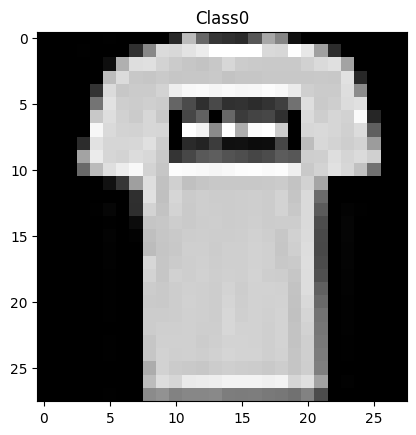

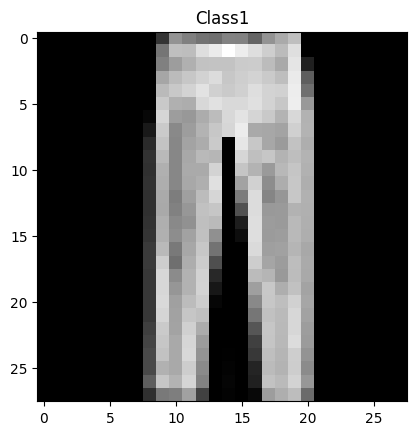

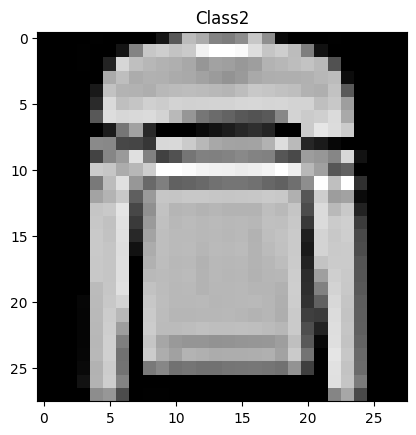

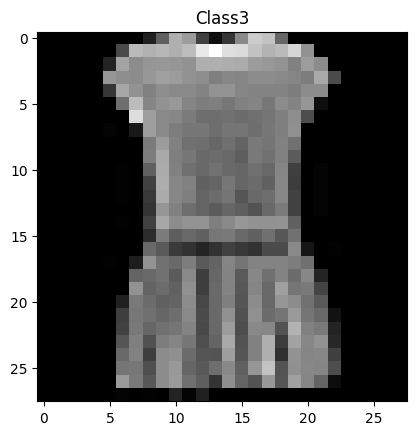

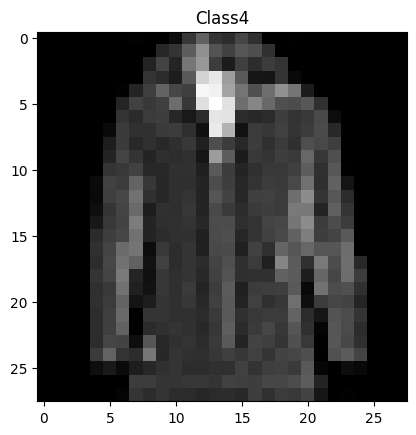

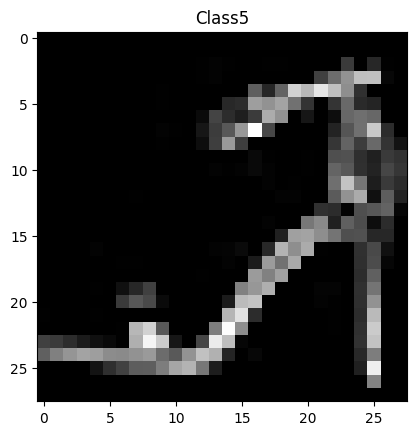

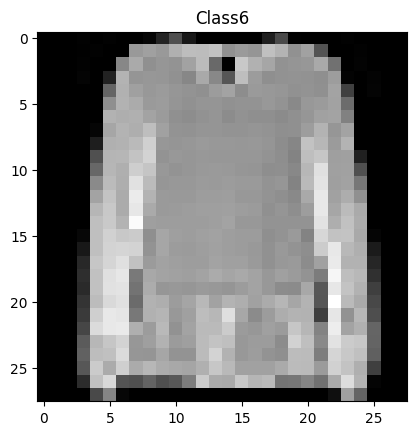

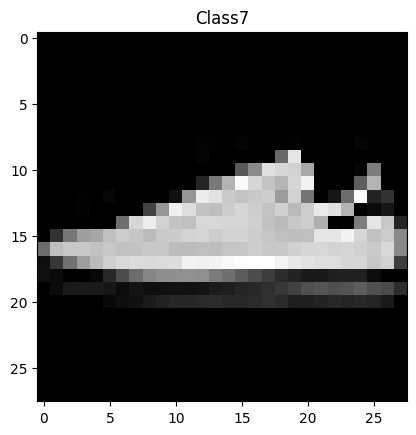

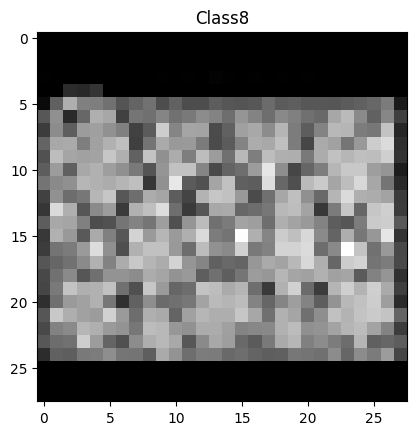

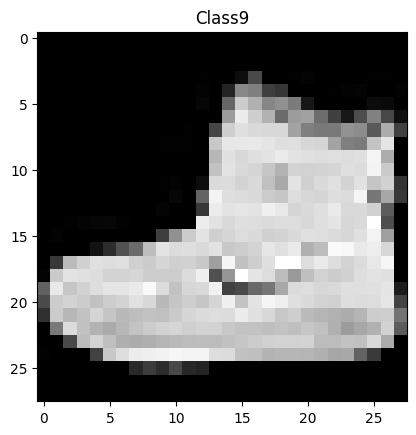

In [14]:
output=pd.DataFrame({'output':ytrain})
groups=output.groupby('output').groups
for i in groups:
    plt.title("Class"+str(i))
    plt.imshow(xtrain[groups[i][0]], cmap='gray')
    plt.show()

In [65]:
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm  = x_test.astype('float32') / 255.0

print("Before normalization:", x_train[0][0][0])  
print("After normalization :", x_train_norm[0][0][0])  

Before normalization: 0
After normalization : 0.0


In [66]:
#ONE-HOT ENCODE LABELS
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

Q2. Performing experiments on Fully Connected Neural Networks (FCNN):

In [67]:
model = Sequential([
    Flatten(input_shape=(28,28)),              
    Dense(256, activation='relu'),             
    Dropout(0.3),                               
    Dense(128, activation='relu'),              
    Dropout(0.3),
    Dense(64, activation='relu'),               
    Dense(10, activation='softmax')             
])

In [68]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
history = model.fit(x_train, y_train_cat,
                    epochs=20, batch_size=128,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5476 - loss: 4.7179 - val_accuracy: 0.6952 - val_loss: 0.8229
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6465 - loss: 1.0256 - val_accuracy: 0.7444 - val_loss: 0.7278
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6801 - loss: 0.8703 - val_accuracy: 0.7642 - val_loss: 0.6150
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7039 - loss: 0.7913 - val_accuracy: 0.7797 - val_loss: 0.5748
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7284 - loss: 0.7261 - val_accuracy: 0.7913 - val_loss: 0.5604
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7489 - loss: 0.6721 - val_accuracy: 0.8128 - val_loss: 0.5523
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7537 - loss: 0.6510 - val_accuracy: 0.7664 - val_loss: 0.5987
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7591 - loss: 0.6285 - val_accuracy: 0.

In [70]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

Test Accuracy: 0.8355000019073486
Test Loss: 0.46420013904571533


In [71]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

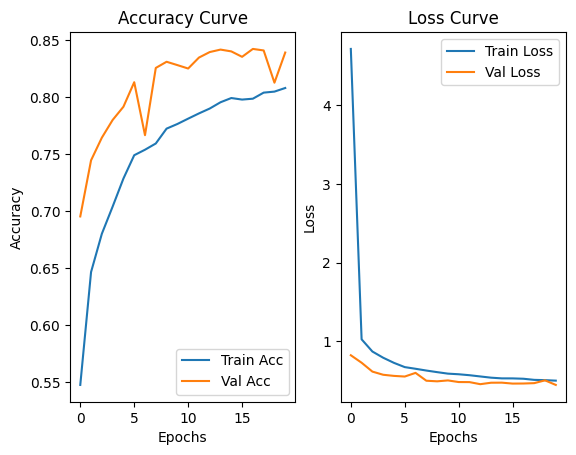

In [72]:
# Accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

# Loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.show()

a.	Design CNN-1 

In [73]:
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn  = np.expand_dims(x_test, -1)

In [74]:
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

cnn1 = Sequential([
    Conv2D(32, (5,5), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

cnn1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [75]:
history_cnn1 = cnn1.fit(x_train_cnn, y_train_cat,
                        epochs=15, batch_size=128,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7985 - loss: 2.0425 - val_accuracy: 0.8595 - val_loss: 0.4057
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8788 - loss: 0.3514 - val_accuracy: 0.8726 - val_loss: 0.3765
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8987 - loss: 0.2828 - val_accuracy: 0.8792 - val_loss: 0.3499
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9096 - loss: 0.2499 - val_accuracy: 0.8799 - val_loss: 0.3508
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9189 - loss: 0.2207 - val_accuracy: 0.8851 - val_loss: 0.3414
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9286 - loss: 0.1954 - val_accuracy: 0.8819 - val_loss: 0.3605
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9318 - loss: 0.1830 - val_accuracy: 0.8680 - val_loss: 0.4351
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9370 - loss: 0.1695 - val_accu

In [76]:
loss1, acc1 = cnn1.evaluate(x_test_cnn, y_test_cat, verbose=0)
print("CNN-1 Test Accuracy:", acc1)

CNN-1 Test Accuracy: 0.886900007724762


CNN-2 DESIGN 

In [77]:
cnn2 = Sequential([
    Conv2D(32, (3,3), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (3,3), strides=1, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

cnn2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [78]:
history_cnn2 = cnn2.fit(x_train_cnn, y_train_cat,
                        epochs=15, batch_size=128,
                        validation_split=0.2,
                        verbose=1)


loss2, acc2 = cnn2.evaluate(x_test_cnn, y_test_cat, verbose=0)
print("CNN-2 Test Accuracy:", acc2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8275 - loss: 0.9050 - val_accuracy: 0.8796 - val_loss: 0.3462
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.8960 - loss: 0.2859 - val_accuracy: 0.8868 - val_loss: 0.3113
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9143 - loss: 0.2289 - val_accuracy: 0.8963 - val_loss: 0.2955
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9280 - loss: 0.1923 - val_accuracy: 0.8912 - val_loss: 0.3125
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9413 - loss: 0.1572 - val_accuracy: 0.9001 - val_loss: 0.3029
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9506 - loss: 0.1299 - val_accuracy: 0.8910 - val_loss: 0.3573
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9572 - loss: 0.1144 - val_accuracy: 0.8999 - val_loss: 0.3541
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9616 - loss: 0.1011 - 

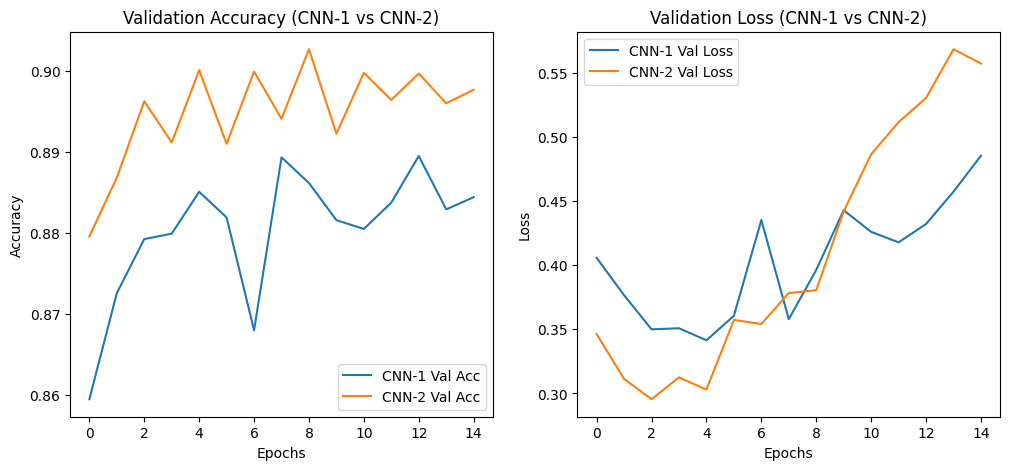

In [79]:
plt.figure(figsize=(12,5))


plt.subplot(1,2,1)
plt.plot(history_cnn1.history['val_accuracy'], label="CNN-1 Val Acc")
plt.plot(history_cnn2.history['val_accuracy'], label="CNN-2 Val Acc")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.title("Validation Accuracy (CNN-1 vs CNN-2)"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn1.history['val_loss'], label="CNN-1 Val Loss")
plt.plot(history_cnn2.history['val_loss'], label="CNN-2 Val Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.title("Validation Loss (CNN-1 vs CNN-2)"); plt.legend()
plt.show()

Compare the performances of FCNN and CNN. 

In [82]:
print("\nPerformance Comparison:")
print(f"FCNN Test Accuracy : {test_acc:.4f}")
print(f"CNN-1 Test Accuracy: {acc1:.4f}")
print(f"CNN-2 Test Accuracy: {acc2:.4f}")


Performance Comparison:
FCNN Test Accuracy : 0.8355
CNN-1 Test Accuracy: 0.8869
CNN-2 Test Accuracy: 0.8911


In [81]:
if acc2 > acc1:
    print("✅ CNN-2 performs better due to deeper architecture.")
else:
    print("✅ CNN-1 performs better (simpler model).")

✅ CNN-2 performs better due to deeper architecture.


In [90]:
# FCNN summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 728,288 (2.78 MB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 485,526 (1.85 MB)

In [91]:
# CNN-1 summary
cnn1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │       460,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,388,228 (5.30 MB)

 Trainable params: 462,742 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 925,486 (3.53 MB)

In [92]:
#CNN-2 Summary
cnn2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │       460,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,414,436 (5.40 MB)

 Trainable params: 471,478 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 942,958 (3.60 MB)

## CNNs have more parameters than FCNN.